<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/RNN_h_long2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 関数の定義

In [0]:
import numpy as np

def f(t, freq=100):
    return np.sin(2. * np.pi * t / freq)

def g(t, freq=100, amp=10, threshold = 10):
    return 1/(1 + np.exp(10 * np.sin(2 * np.pi * t / freq) + 10))

def h(t, freqs=[11, 23, 31, 41, 53, 61, 71, 83, 97]):
    value = np.zeros_like(t)
    for freq in freqs:
        value += f(t, freq)
    return value

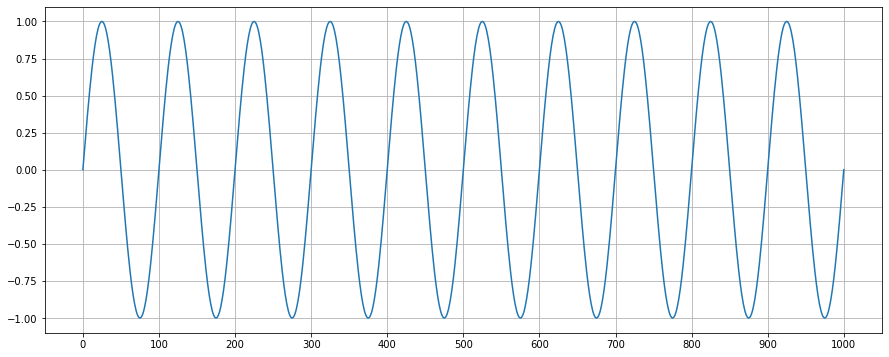

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 1000
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(f(times))
plt.xticks(np.linspace(0, 1000, 11))
plt.grid()

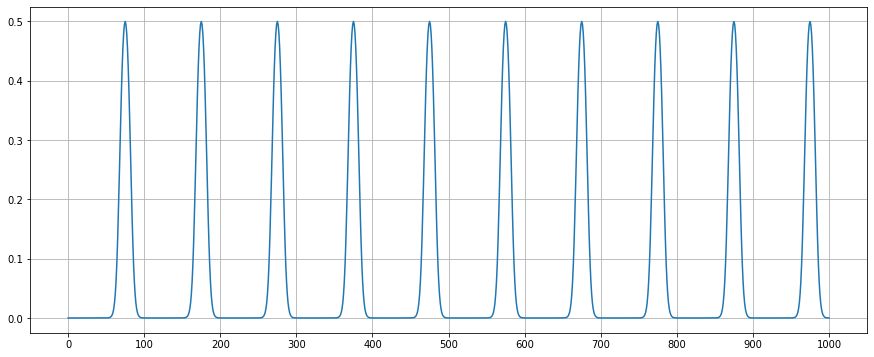

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 1000
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(g(times))
plt.xticks(np.linspace(0, 1000, 11))
plt.grid()

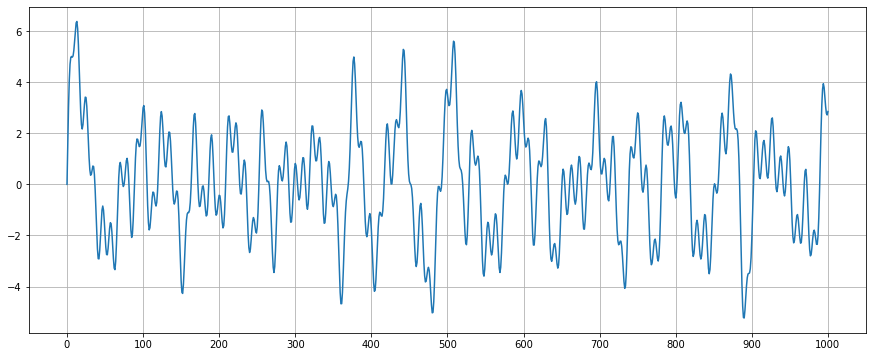

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 1000
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(h(times))
plt.xticks(np.linspace(0, 1000, 11))
plt.grid()

# 関数のフーリエ変換

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


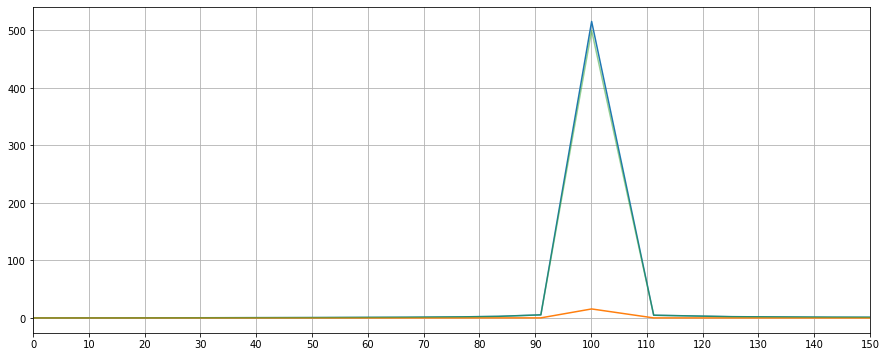

In [0]:
sp = np.fft.fft(f(times))
freq = np.fft.fftfreq(times.shape[-1])
plt.figure(figsize=(15, 6))
plt.plot(1/freq, abs(sp.real) + abs(sp.imag))
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


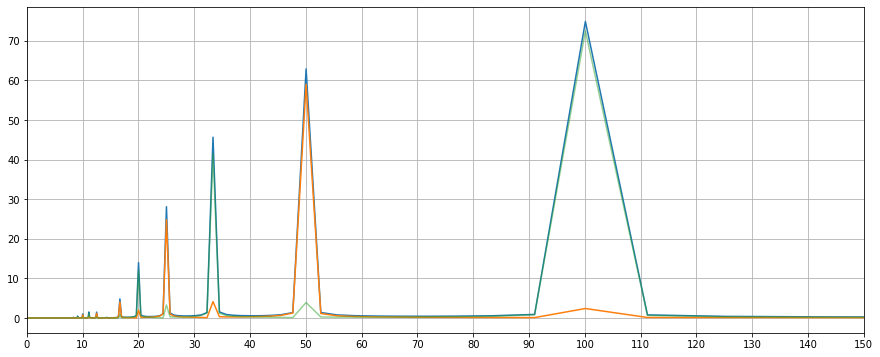

In [0]:
sp = np.fft.fft(g(times))
freq = np.fft.fftfreq(times.shape[-1])
plt.figure(figsize=(15, 6))
plt.plot(1/freq, abs(sp.real) + abs(sp.imag))
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


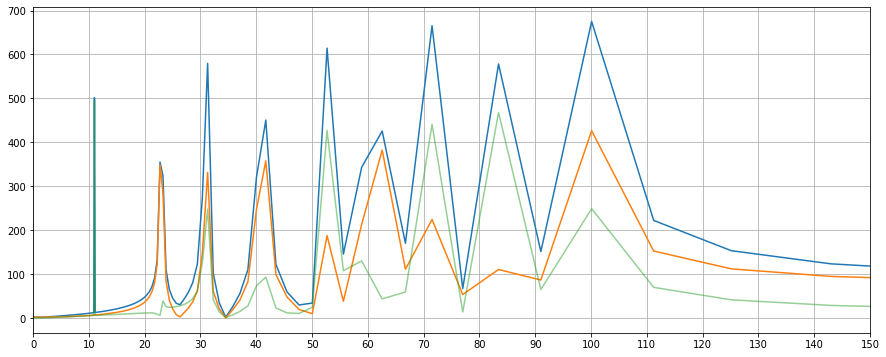

In [0]:
sp = np.fft.fft(h(times))
freq = np.fft.fftfreq(times.shape[-1])
plt.figure(figsize=(15, 6))
plt.plot(1/freq, abs(sp.real) + abs(sp.imag))
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

# 時系列データセットの作成

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

func = h

total_time_length = 10000
pred_length = 1000
learning_time_length = 100
time_series_T = np.linspace(0, total_time_length, total_time_length + 1)
time_series_X = func(time_series_T)

X_learn = []
Y_learn = []
for i in range(total_time_length - learning_time_length):
    X_learn.append(time_series_X[i:i+learning_time_length].reshape(1, learning_time_length).T)
    Y_learn.append([time_series_X[i+learning_time_length]])

X_train, X_val, Y_train, Y_val = \
train_test_split(X_learn, Y_learn, test_size=0.2, shuffle=False)

X_train2sklearn = [list(x.reshape(1, len(x))[0]) for x in X_train]
Y_train2sklearn = [y[0] for y in Y_train]

# 多層パーセプトロン(scikit-learn)

In [0]:
%%time
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(100, 100, 100), 
                         early_stopping=True, max_iter=10000) # 回帰器の生成
regressor.fit(X_train2sklearn, Y_train2sklearn) # 学習

CPU times: user 11.4 s, sys: 5.85 s, total: 17.3 s
Wall time: 8.8 s


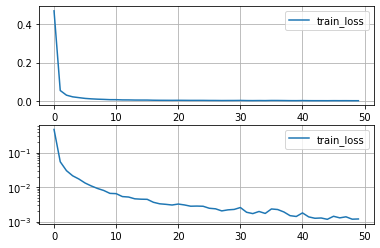

In [0]:
plt.plot(regressor.loss_curve_)
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(regressor.loss_curve_, label='train_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(regressor.loss_curve_, label='train_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
pred_length = 1000
X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = [Y_pred[i:i+learning_time_length]]
    Y_ = regressor.predict(X_)
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 399 ms, sys: 318 ms, total: 717 ms
Wall time: 386 ms


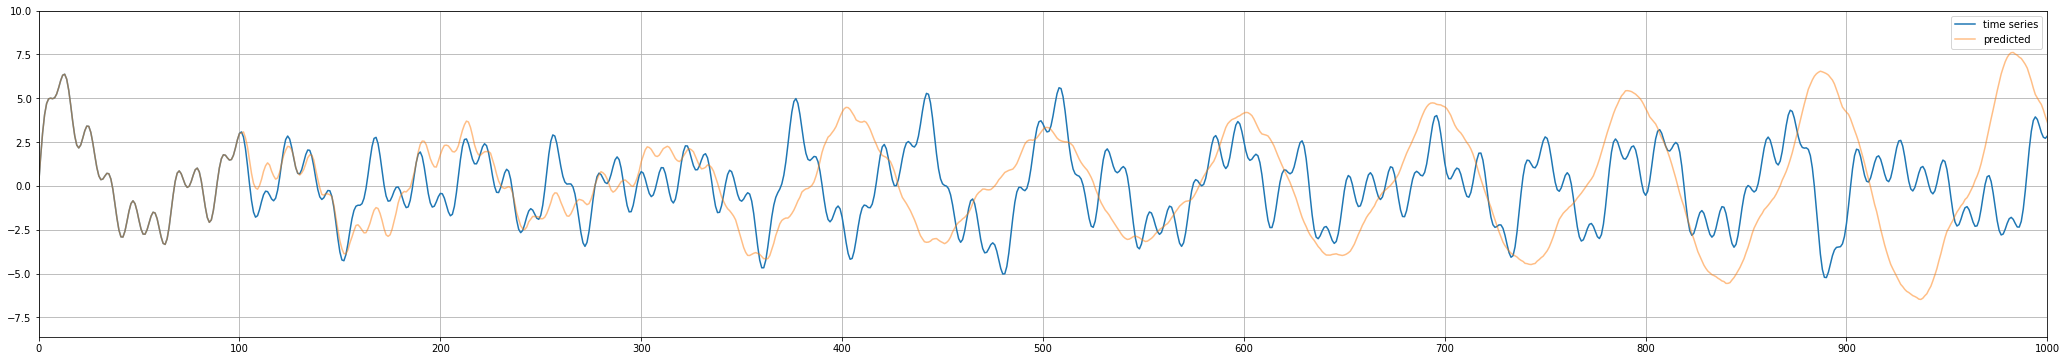

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


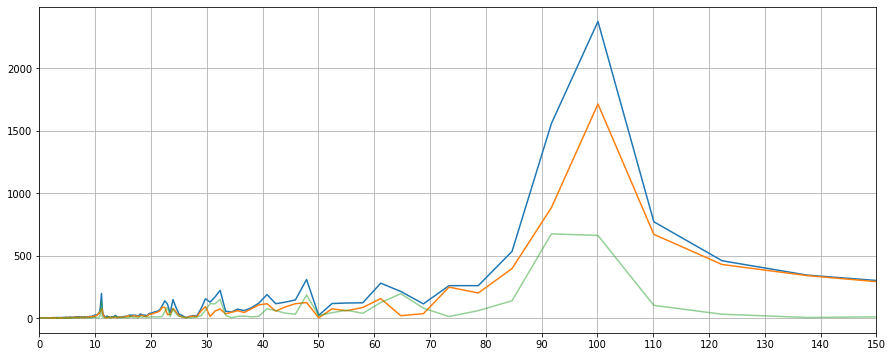

In [0]:
sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])
plt.figure(figsize=(15, 6))
plt.plot(1/freq, abs(sp.real) + abs(sp.imag))
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

# PyTorch で再帰的ニューラルネットワーク

In [0]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## RNN

In [0]:
import torch
class RNN(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.RNN(1, hidden_dim,
                         nonlinearity='tanh',
                         batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## LSTM

In [0]:
import torch
class LSTM(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.LSTM(1, hidden_dim, batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## GRU

In [0]:
import torch
class GRU(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.GRU(1, hidden_dim, batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## EarlyStopping

In [0]:
def EarlyStopping(log, patience=10):
    if len(log) <= patience:
        return False
    min1 = log[:len(log)-patience].min()
    min2 = log[len(log)-patience:].min()
    if min1 <= min2:
        return True
    else:
        return False

## RNN の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = RNN(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 200
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 1.2325962143830764 Val loss: 0.25989004224538803
Epoch: 2 Train loss: 0.1510880372654169 Val loss: 0.07710612927460009
Epoch: 3 Train loss: 0.06095519609367236 Val loss: 0.04143448582746916
Epoch: 4 Train loss: 0.036029950309640325 Val loss: 0.027386591562794313
Epoch: 5 Train loss: 0.024430835106147405 Val loss: 0.018604329243923228
Epoch: 6 Train loss: 0.017475102454997025 Val loss: 0.014282292453572154
Epoch: 7 Train loss: 0.013497049472509669 Val loss: 0.011161423327090839
Epoch: 8 Train loss: 0.010936055177201828 Val loss: 0.009753334892189337
Epoch: 9 Train loss: 0.009132427844003988 Val loss: 0.007257270031712121
Epoch: 10 Train loss: 0.007422382734381618 Val loss: 0.006048906154723631
Epoch: 11 Train loss: 0.006404495392090235 Val loss: 0.005161227852416535
Epoch: 12 Train loss: 0.005536466798124214 Val loss: 0.004622943692892376
Epoch: 13 Train loss: 0.00465051563253674 Val loss: 0.0039539939995544655
Epoch: 14 Train loss: 0.004189692670479417 Val loss: 0.

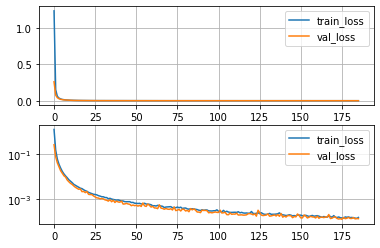

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 2.51 s, sys: 5.04 ms, total: 2.51 s
Wall time: 2.51 s


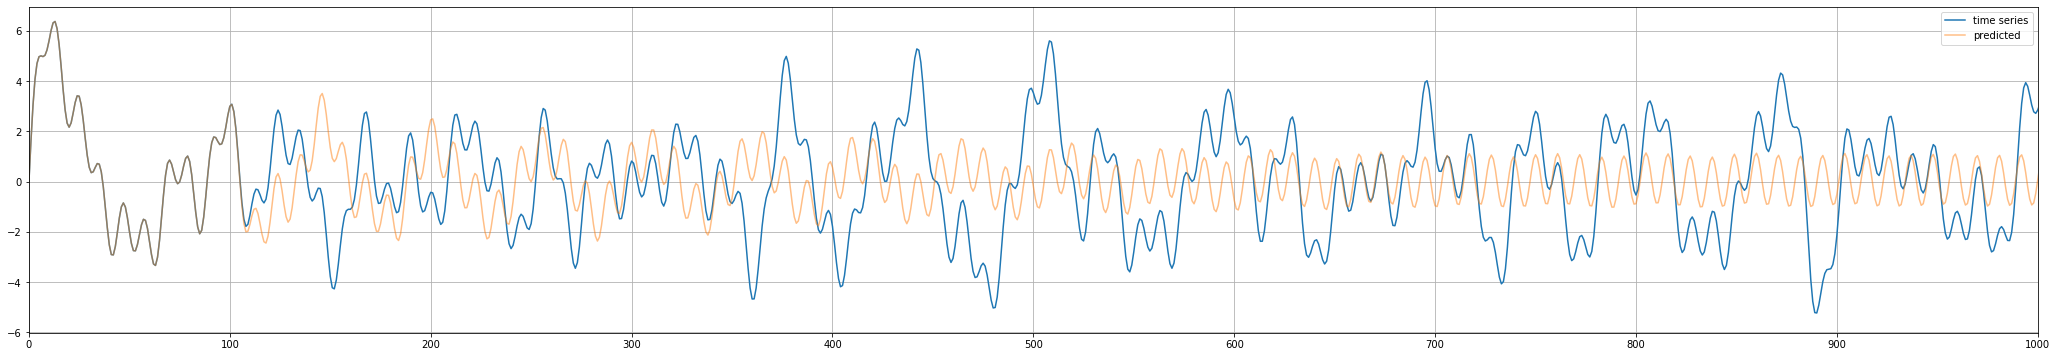

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


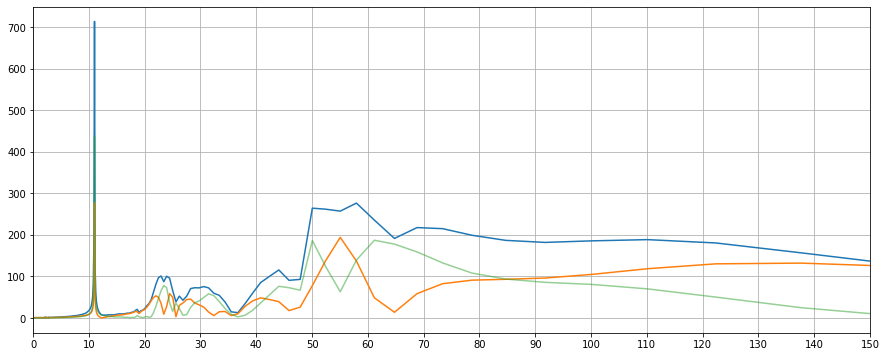

In [0]:
sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])
plt.figure(figsize=(15, 6))
plt.plot(1/freq, abs(sp.real) + abs(sp.imag))
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

## LSTM の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = LSTM(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 200
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 2.694736753518765 Val loss: 1.0890509353743658
Epoch: 2 Train loss: 0.40433679721676385 Val loss: 0.11576407009528743
Epoch: 3 Train loss: 0.06611810051477872 Val loss: 0.04028445647822486
Epoch: 4 Train loss: 0.031093299066504605 Val loss: 0.020356805089654192
Epoch: 5 Train loss: 0.01864939474930557 Val loss: 0.013132257568132546
Epoch: 6 Train loss: 0.012945536918078478 Val loss: 0.010457846154976223
Epoch: 7 Train loss: 0.009847030055542022 Val loss: 0.0074810468358919024
Epoch: 8 Train loss: 0.007449646107255457 Val loss: 0.007352858730074432
Epoch: 9 Train loss: 0.0056275290180332 Val loss: 0.005466018945703076
Epoch: 10 Train loss: 0.004835805652710872 Val loss: 0.004627546411938965
Epoch: 11 Train loss: 0.004146260240724167 Val loss: 0.0035710244944008687
Epoch: 12 Train loss: 0.003645482344720035 Val loss: 0.0034421694193345806
Epoch: 13 Train loss: 0.003247638888215312 Val loss: 0.0028451203543227166
Epoch: 14 Train loss: 0.0029758228084597834 Val loss: 0

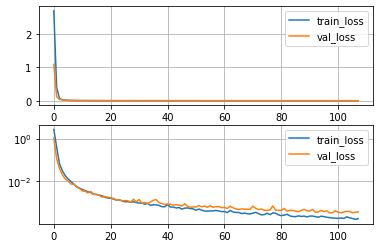

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 7.39 s, sys: 12 ms, total: 7.4 s
Wall time: 7.42 s


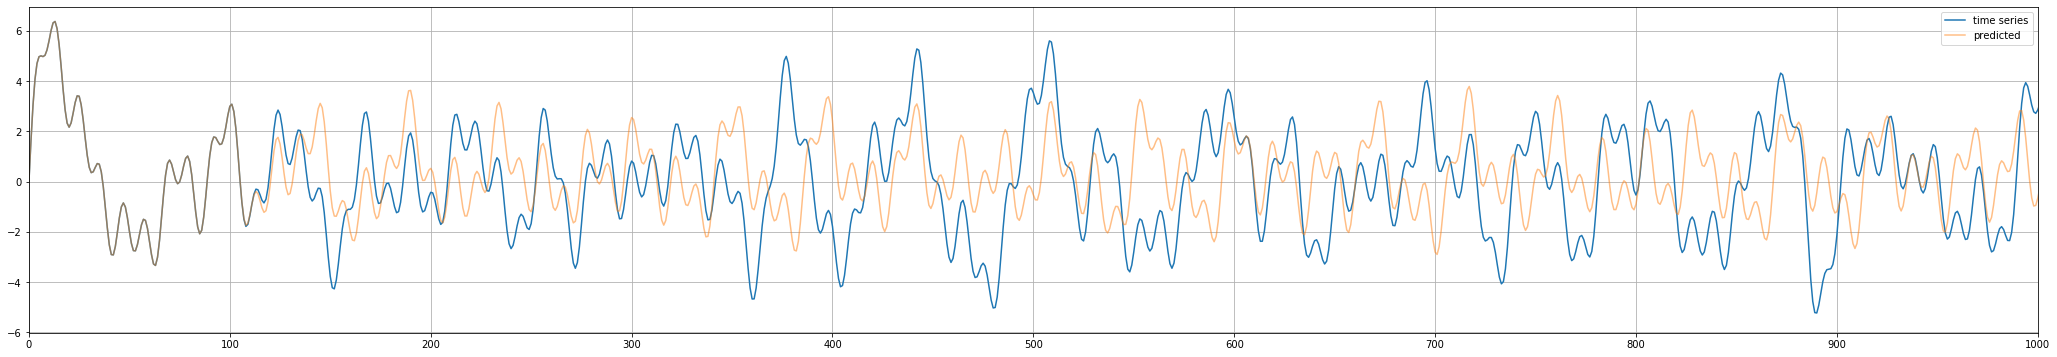

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


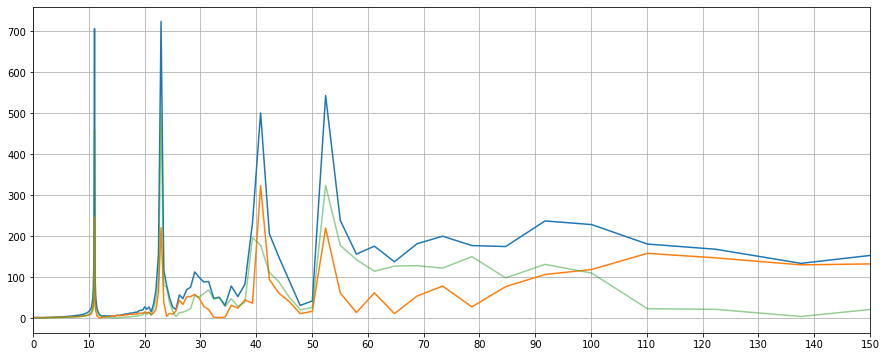

In [0]:
sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])
plt.figure(figsize=(15, 6))
plt.plot(1/freq, abs(sp.real) + abs(sp.imag))
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

## GRU の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = GRU(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 200
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 2.1682570293927803 Val loss: 0.7186631825235155
Epoch: 2 Train loss: 0.31950099231340945 Val loss: 0.15391464407245317
Epoch: 3 Train loss: 0.11271000572313102 Val loss: 0.07481829987631904
Epoch: 4 Train loss: 0.06226739526177064 Val loss: 0.04589401351081
Epoch: 5 Train loss: 0.039595081041065544 Val loss: 0.032392920615772404
Epoch: 6 Train loss: 0.027897256808594253 Val loss: 0.02346322623391946
Epoch: 7 Train loss: 0.022004335223195646 Val loss: 0.018588285324060254
Epoch: 8 Train loss: 0.018219510093331337 Val loss: 0.01524086022335622
Epoch: 9 Train loss: 0.014514407954919033 Val loss: 0.012776221355630292
Epoch: 10 Train loss: 0.011674956251413394 Val loss: 0.010565925415398346
Epoch: 11 Train loss: 0.010341153318922106 Val loss: 0.009217705137820708
Epoch: 12 Train loss: 0.008554489680159932 Val loss: 0.007347087220599254
Epoch: 13 Train loss: 0.007457663436444142 Val loss: 0.007630001287907362
Epoch: 14 Train loss: 0.006860797941231002 Val loss: 0.0072047

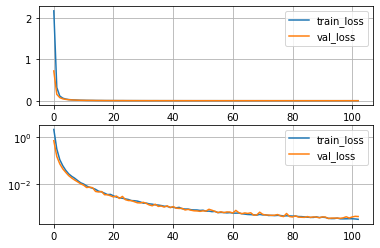

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 8.56 s, sys: 7.81 ms, total: 8.57 s
Wall time: 8.59 s


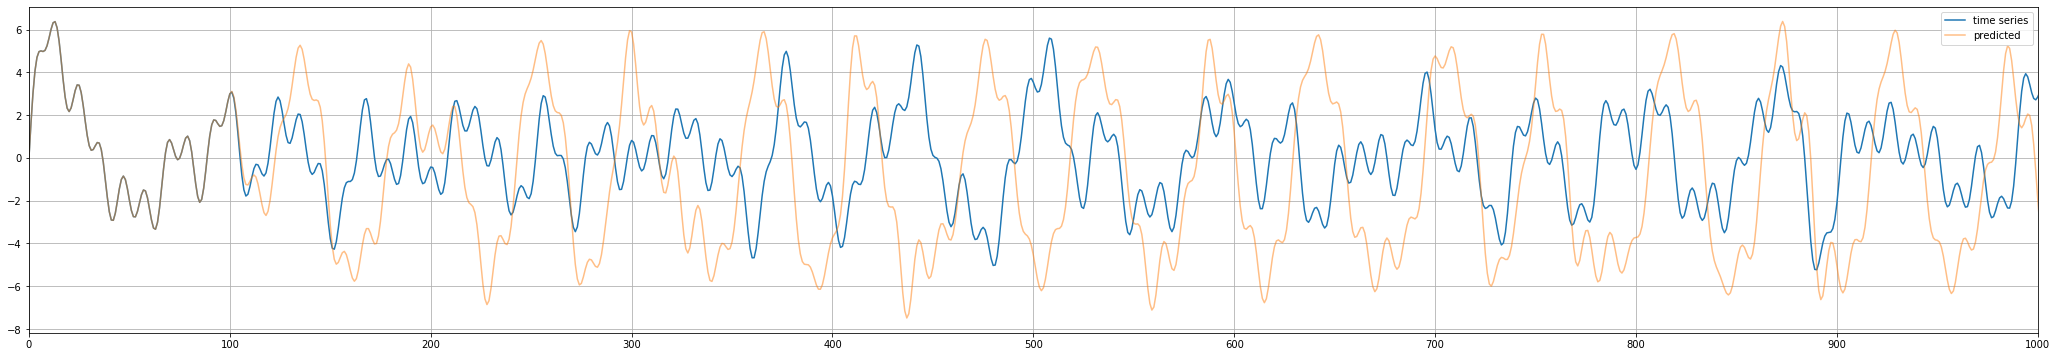

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


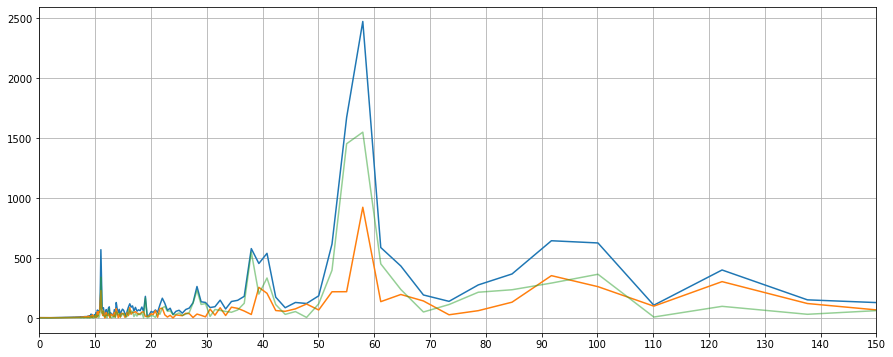

In [0]:
sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])
plt.figure(figsize=(15, 6))
plt.plot(1/freq, abs(sp.real) + abs(sp.imag))
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()